In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4636927cdcc9c1553cd45838b21f1205


In [15]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 15 of Set 25 | bredasdorp
Processing Record 16 of Set 25 | mildura
Processing Record 17 of Set 25 | pacific grove
Processing Record 18 of Set 25 | hamilton
Processing Record 19 of Set 25 | jamestown
Processing Record 20 of Set 25 | kapaa
Processing Record 21 of Set 25 | cape town
Processing Record 22 of Set 25 | khatanga
Processing Record 23 of Set 25 | nantucket
Processing Record 24 of Set 25 | sao filipe
Processing Record 25 of Set 25 | preobrazheniye
Processing Record 26 of Set 25 | albany
Processing Record 27 of Set 25 | amga
Processing Record 28 of Set 25 | hermanus
Processing Record 29 of Set 25 | illoqqortoormiut
City not found. Skipping...
Processing Record 30 of Set 25 | mataura
Processing Record 31 of Set 25 | kodiak
Processing Record 32 of Set 25 | avarua
Processing Record 33 of Set 25 | leningradskiy
Processing Record 34 of Set 25 | severo-kurilsk
Processing Record 35 of Set 25 | new norfolk
Processing Record 36 of Set 25 | atuona
Processing Record 37 of S

City not found. Skipping...
Processing Record 37 of Set 28 | ahuimanu
Processing Record 38 of Set 28 | aklavik
Processing Record 39 of Set 28 | tual
Processing Record 40 of Set 28 | sao joao da barra
Processing Record 41 of Set 28 | tautira
Processing Record 42 of Set 28 | caravelas
Processing Record 43 of Set 28 | laguna
Processing Record 44 of Set 28 | kenai
Processing Record 45 of Set 28 | algiers
Processing Record 46 of Set 28 | hihifo
City not found. Skipping...
Processing Record 47 of Set 28 | matara
Processing Record 48 of Set 28 | touros
Processing Record 49 of Set 28 | san quintin
Processing Record 50 of Set 28 | souillac
Processing Record 1 of Set 29 | dillon
Processing Record 2 of Set 29 | dikson
Processing Record 3 of Set 29 | znin
Processing Record 4 of Set 29 | gijon
Processing Record 5 of Set 29 | quesnel
Processing Record 6 of Set 29 | lao cai
Processing Record 7 of Set 29 | vanimo
Processing Record 8 of Set 29 | utiel
Processing Record 9 of Set 29 | srandakan
Processin

Processing Record 19 of Set 32 | kencong
Processing Record 20 of Set 32 | kosovska mitrovica
Processing Record 21 of Set 32 | acari
Processing Record 22 of Set 32 | ocean city
Processing Record 23 of Set 32 | bur gabo
City not found. Skipping...
Processing Record 24 of Set 32 | san ramon de la nueva oran
Processing Record 25 of Set 32 | srednekolymsk
Processing Record 26 of Set 32 | belmonte
Processing Record 27 of Set 32 | ugep
Processing Record 28 of Set 32 | new boston
Processing Record 29 of Set 32 | bauska
Processing Record 30 of Set 32 | srikakulam
Processing Record 31 of Set 32 | nizhniy chir
Processing Record 32 of Set 32 | sobolevo
Processing Record 33 of Set 32 | barra
Processing Record 34 of Set 32 | birao
Processing Record 35 of Set 32 | henties bay
Processing Record 36 of Set 32 | college
Processing Record 37 of Set 32 | kavieng
Processing Record 38 of Set 32 | yelan
Processing Record 39 of Set 32 | neuquen
Processing Record 40 of Set 32 | enshi
Processing Record 41 of Set

Processing Record 6 of Set 36 | ananas
Processing Record 7 of Set 36 | jalu
Processing Record 8 of Set 36 | namibe
Processing Record 9 of Set 36 | mayo
Processing Record 10 of Set 36 | darlowo
Processing Record 11 of Set 36 | vitim
Processing Record 12 of Set 36 | port hardy
Processing Record 13 of Set 36 | sept-iles
Processing Record 14 of Set 36 | chuy
Processing Record 15 of Set 36 | flinders
Processing Record 16 of Set 36 | hegang
Processing Record 17 of Set 36 | kingaroy
Processing Record 18 of Set 36 | tsaratanana
Processing Record 19 of Set 36 | belle fourche
Processing Record 20 of Set 36 | lata
Processing Record 21 of Set 36 | yinchuan
Processing Record 22 of Set 36 | kinablangan
Processing Record 23 of Set 36 | weinan
Processing Record 24 of Set 36 | cayenne
Processing Record 25 of Set 36 | singaraja
Processing Record 26 of Set 36 | bintulu
Processing Record 27 of Set 36 | ewa beach
Processing Record 28 of Set 36 | saint-georges
Processing Record 29 of Set 36 | andros town
Pr

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,64.40,88,47,3.36,ZA,2020-10-27 02:40:48
1,Mildura,-34.20,142.15,62.01,77,90,11.41,AU,2020-10-27 02:43:17
2,Pacific Grove,36.62,-121.92,59.00,38,1,3.36,US,2020-10-27 02:42:01
3,Hamilton,39.18,-84.53,48.20,81,90,3.36,US,2020-10-27 02:39:06
4,Jamestown,42.10,-79.24,44.01,100,90,2.84,US,2020-10-27 02:40:34
5,Kapaa,22.08,-159.32,73.40,88,90,11.41,US,2020-10-27 02:43:17
6,Cape Town,-33.93,18.42,61.00,93,0,5.82,ZA,2020-10-27 02:43:17
7,Khatanga,71.97,102.50,2.12,94,89,9.17,RU,2020-10-27 02:43:17
8,Nantucket,41.28,-70.10,57.99,95,90,4.70,US,2020-10-27 02:41:38
9,Sao Filipe,14.90,-24.50,79.21,81,98,10.11,CV,2020-10-27 02:43:18


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-10-27 02:40:48,-34.53,20.04,64.40,88,47,3.36
1,Mildura,AU,2020-10-27 02:43:17,-34.20,142.15,62.01,77,90,11.41
2,Pacific Grove,US,2020-10-27 02:42:01,36.62,-121.92,59.00,38,1,3.36
3,Hamilton,US,2020-10-27 02:39:06,39.18,-84.53,48.20,81,90,3.36
4,Jamestown,US,2020-10-27 02:40:34,42.10,-79.24,44.01,100,90,2.84
...,...,...,...,...,...,...,...,...,...
564,Loa Janan,ID,2020-10-27 02:44:31,-0.58,117.09,82.87,79,81,5.50
565,Nador,MA,2020-10-27 02:44:31,35.17,-2.93,60.80,67,0,6.93
566,Yeppoon,AU,2020-10-27 02:44:31,-23.13,150.73,82.40,61,75,9.17
567,Tashtagol,RU,2020-10-27 02:44:31,52.77,87.89,37.98,78,100,3.67


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603817127.9816816

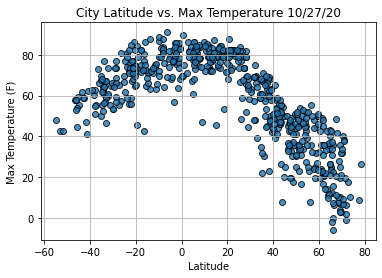

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

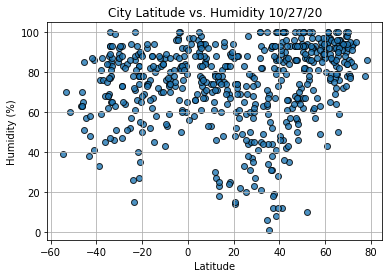

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

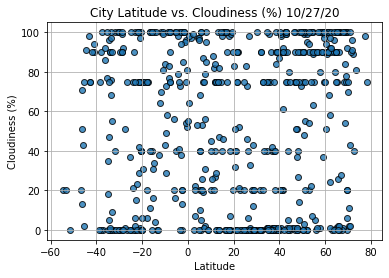

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

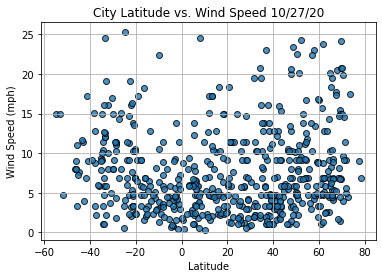

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()